In [2]:
import numpy as np
from numpy import reshape
import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

In [3]:
attacks = [ 'fgsm', 'bim', 'pgd', 'std/8_255', 'df', 'cw']
NR_SAMPLES = 1000

In [4]:
# chars     = torch.load('./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/std/8_255/LID/k_10/characteristics')[:NR_SAMPLES]
# chars_adv = torch.load('./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/std/8_255/LID/k_10/characteristics_adv')

y = []
characteristics_adv = {}
characteristics_clean = {}

for it, att in enumerate(attacks):
    clean     = torch.load('./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LID/k_10/characteristics'.format(att) )[:NR_SAMPLES]
    clean     = torch.load('./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LID/k_10/characteristics'.format(att) )[:NR_SAMPLES]
    chars_adv = torch.load('./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LID/k_10/characteristics_adv'.format(att) )[:NR_SAMPLES]
    characteristics_clean[att] = clean
    characteristics_adv[att]   = chars_adv
    
    
    # y.append( np.zeros((chars_adv.shape[0])) +  np.ones((chars_adv.shape[0])) *it )

In [5]:
for att in attacks:
    print(characteristics_adv[att].shape)

(1000, 13)
(1000, 13)
(1000, 13)
(1000, 13)
(1000, 13)
(1000, 13)


In [6]:
layers = [ x  for x in range(12)]
attacks = ['gauss', 'fgsm', 'bim', 'pgd', 'std/8_255', 'df', 'cw']
labels = ['gauss', 'fgsm', 'bim', 'pgd', 'aa', 'df', 'cw']
cdict        = {0: 'black', 1: 'pink', 2: 'blue', 3: 'red', 4: 'green', 5: 'cyan', 6: 'orange', 7: 'purple'}

In [7]:
layers = [ x  for x in range(12)]
attacks = ['fgsm', 'bim', 'pgd', 'std/8_255', 'df', 'cw']
labels  = ['fgsm', 'bim', 'pgd', 'aa',        'df', 'cw']
cdict        = {0: 'black', 1: 'blue', 2: 'red', 3: 'green', 4: 'cyan', 5: 'orange', 6: 'purple'}

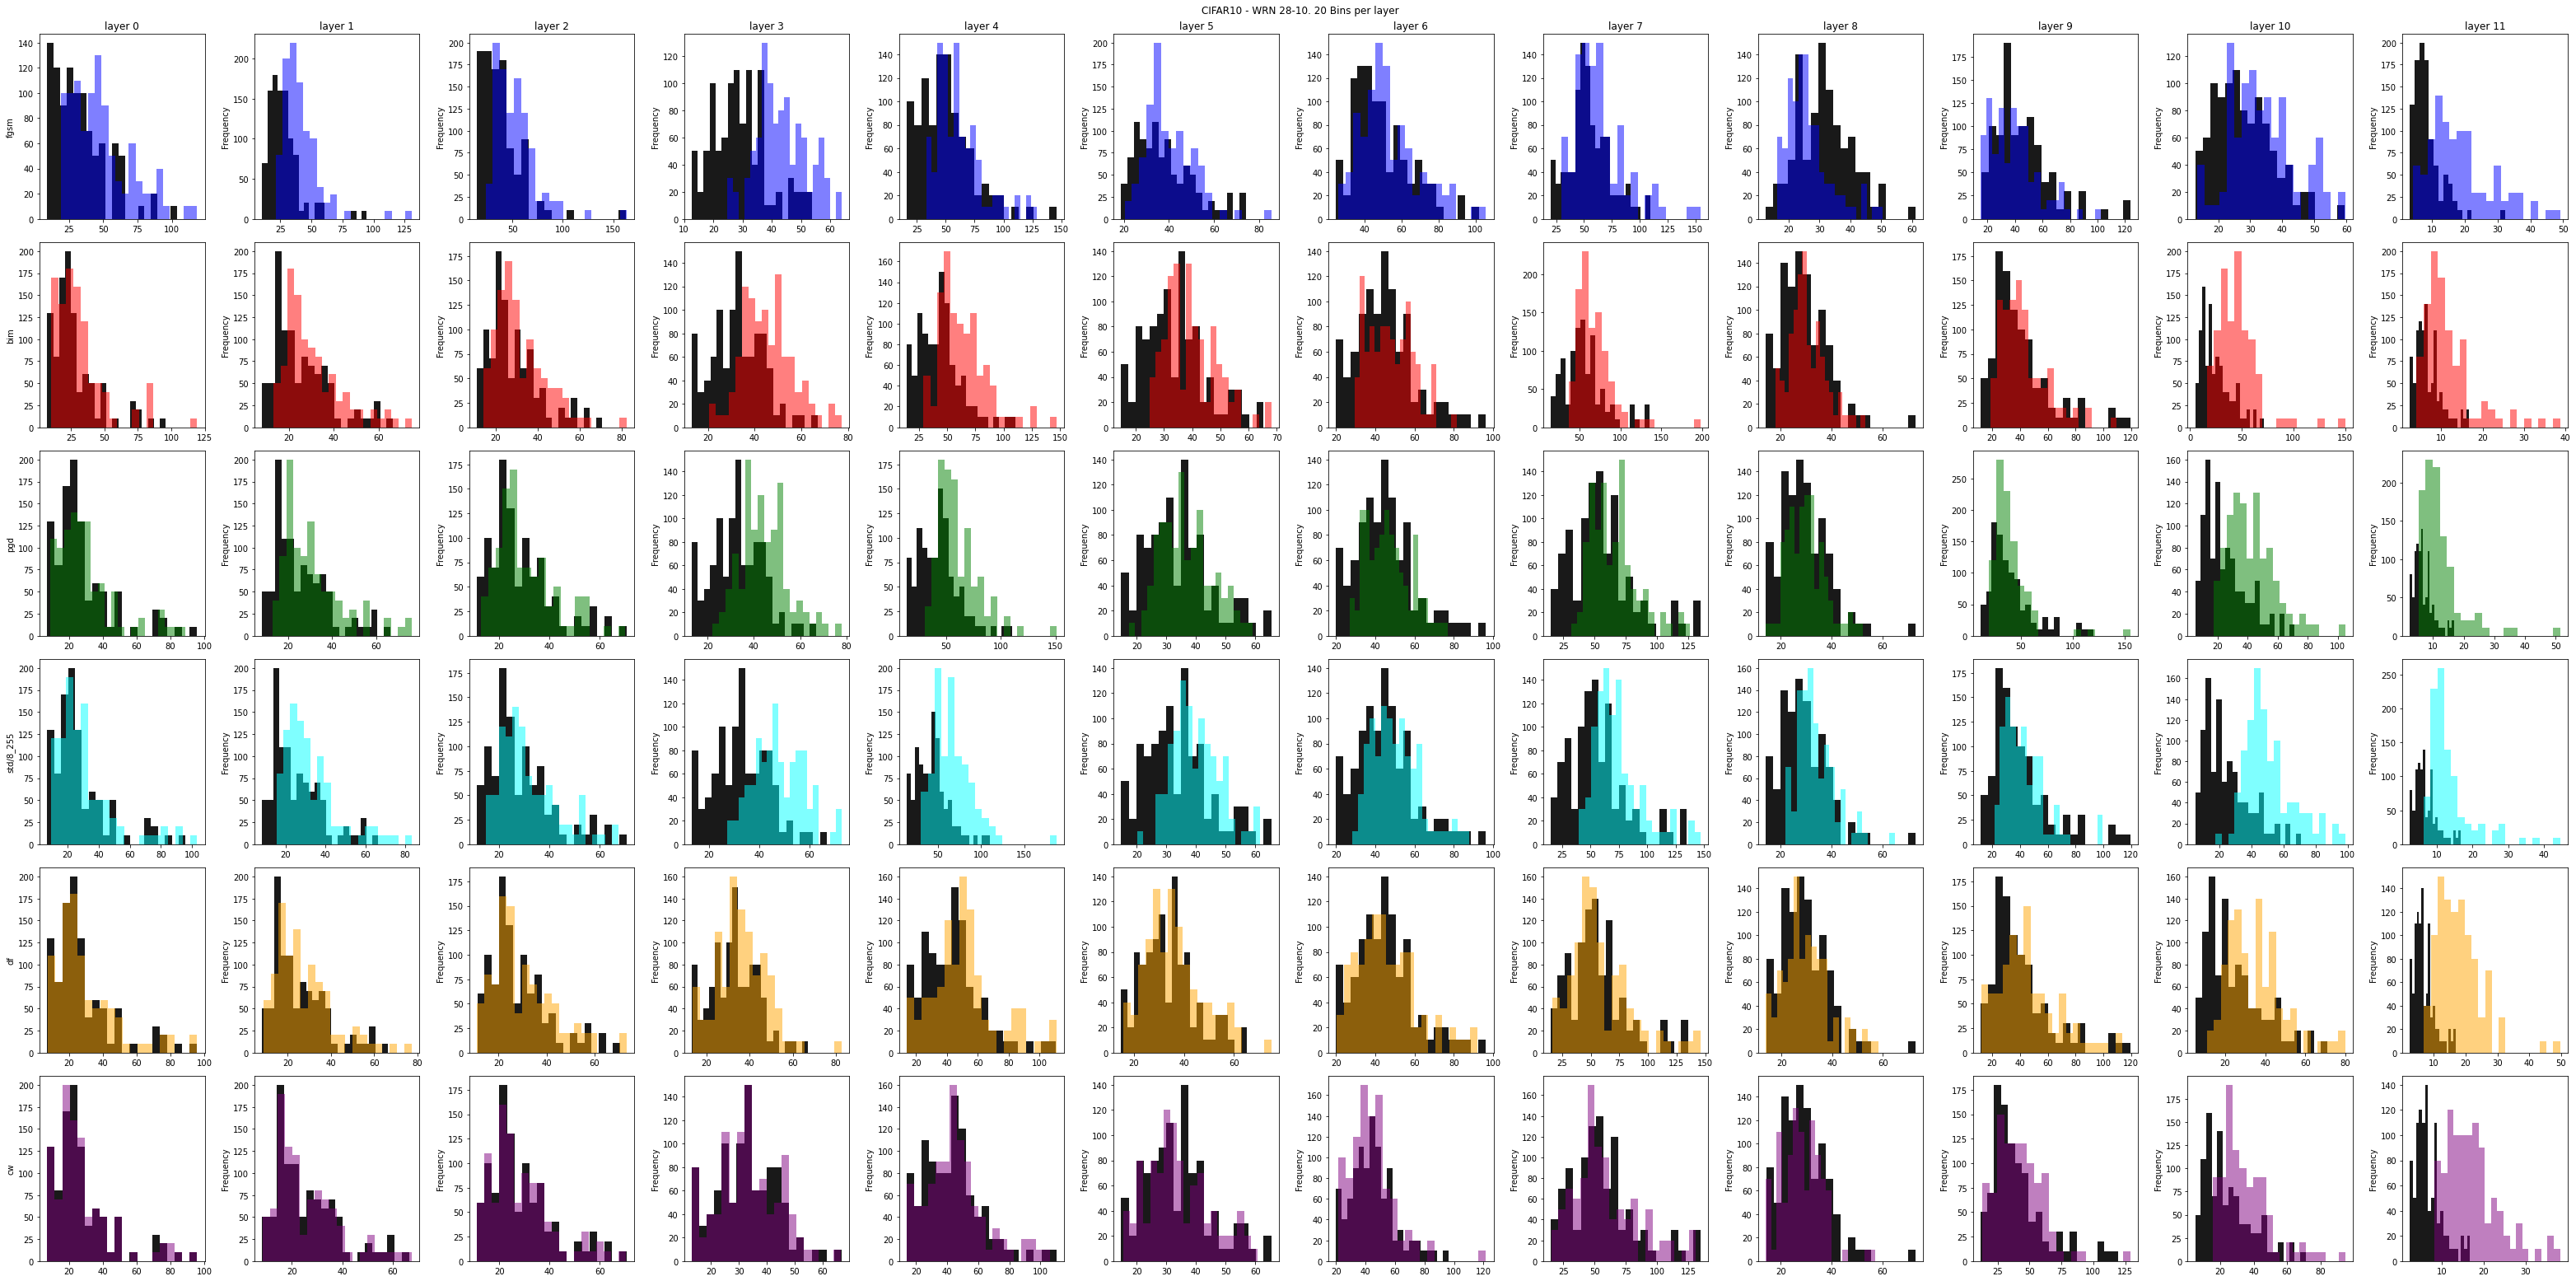

In [8]:
fig, axs = plt.subplots(len(attacks), len(layers), figsize=(44, 22))
BINS = 20

fig.suptitle( "CIFAR10 - WRN 28-10. {} Bins per layer ".format(BINS) )

for i, att in enumerate(attacks):
    
    for layer in layers:
        df = pd.DataFrame.from_dict(characteristics_clean[att])
        df_adv = pd.DataFrame.from_dict(characteristics_adv[att])
        df[int(layer)].plot.hist( ax=axs[i, layer],     bins=BINS, color='black',   alpha = 0.9)
        df_adv[int(layer)].plot.hist( ax=axs[i, layer], bins=BINS, color=cdict[i+1], alpha = 0.5 )
        if layer == 0:
            axs[i, 0].set_ylabel(att)
        if i == 0:
            axs[i,layer].set_title("layer {}".format(layer))
            
fig.tight_layout(rect=[0, 0, 0.99, 0.99])

In [9]:
fig.savefig( 'plots/' + str(NR_SAMPLES) + '/' + 'cifar10_hist.svg')

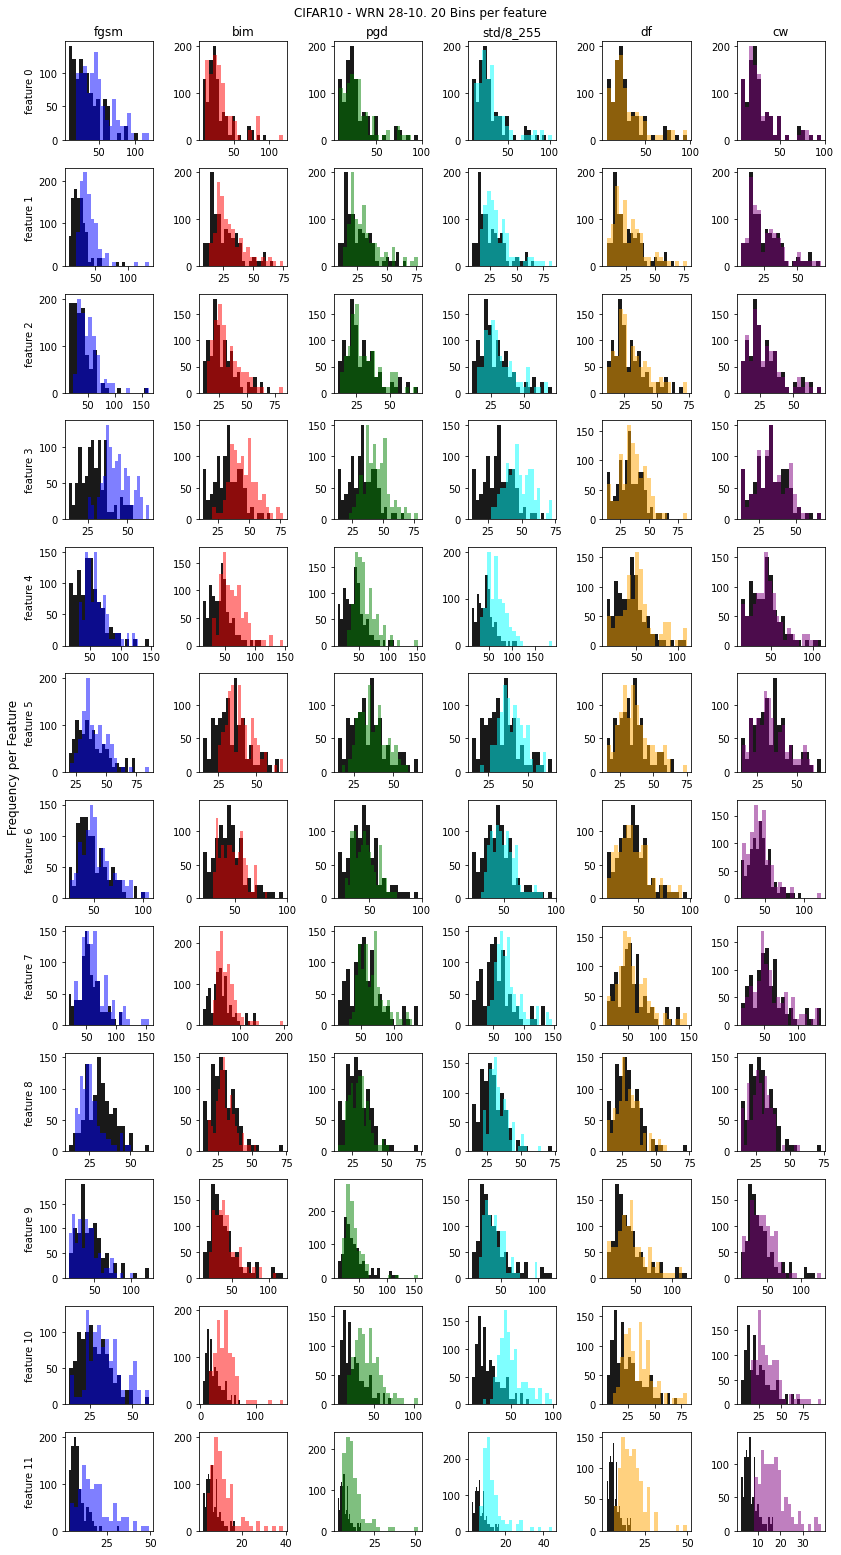

In [10]:
fig, axs = plt.subplots( len(layers), len(attacks), figsize=(12, 22))
BINS = 20

fig.suptitle( "CIFAR10 - WRN 28-10. {} Bins per feature ".format(BINS) )
fig.supylabel('Frequency per Feature')

for i, att in enumerate(attacks):
    
    for layer in layers:
        df = pd.DataFrame.from_dict(characteristics_clean[att])
        df_adv = pd.DataFrame.from_dict(characteristics_adv[att])
        df[int(layer)].plot.hist( ax=axs[layer, i],     bins=BINS, color='black',   alpha = 0.9)
        df_adv[int(layer)].plot.hist( ax=axs[layer, i], bins=BINS, color=cdict[i+1], alpha = 0.5 )
        if i  == 0:
            axs[layer, i].set_ylabel("feature {}".format(layer))
        if i  > 0:
            axs[layer, i].set_ylabel("")
        if layer == 0:
            axs[layer, i].set_title(att)
            
fig.tight_layout(rect=[0, 0, 0.99, 0.99])

In [11]:
fig.savefig( 'plots/' + str(NR_SAMPLES) + '/' + 'cifar10_hist_vert.svg')